## Hotel Booking Demand Analysis - EDA 


### Objective

Perform a comprehensive Exploratory Data Analysis (EDA) on hotel booking data from City and Resort hotels to uncover patterns, trends, and actionable insights related to bookings, cancellations, customer behavior, and seasonality.

### 1. Importing Libraries

In [1]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Styling
sns.set(style='whitegrid')


### 2. Load the Dataset

In [2]:
df = pd.read_csv('../Data/hotel_bookings.csv')  # Adjust path as needed
df.head(5)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### 3. Initial Data Overview

#### 3.1 Shape and Basic Info

In [3]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  i

#### 3.2 Summary Statistics

In [4]:
df.describe(include='all')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,no,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015
freq,79330,75166,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,NaN,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### 4. Data Cleaning

#### 4.1 Check for Missing Values

In [5]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


company     112593
agent        16340
country        488
children         4
dtype: int64

#### 4.2 Handling Missing Data

In [6]:
# Fill missing 'children' with 0
df['children'].fillna(0, inplace=True)

# Fill missing 'country' with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Drop rows with missing 'agent'
df['agent'].fillna(0, inplace=True)

# Drop rows with missing 'company'
df['company'].fillna(0, inplace=True)


### 5. Feature Engineering

####  5.1 Create Full Date Column

In [7]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'] + '-' +
                                     df['arrival_date_day_of_month'].astype(str))


### 6. Exploratory Data Analysis

#### 6.1 Hotel Type Distribution

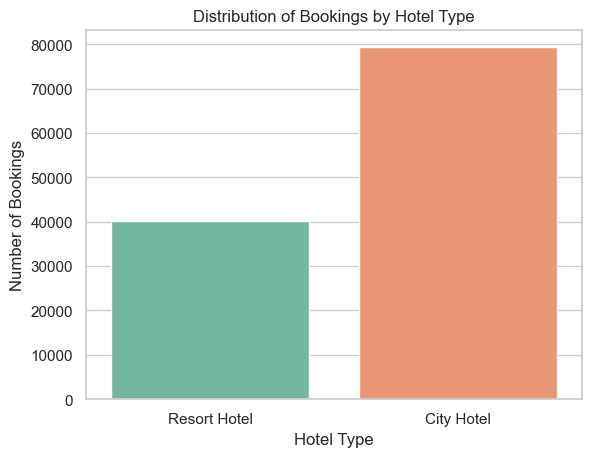

In [8]:
import os

# Create the directory if it doesn't exist
os.makedirs('../visuals', exist_ok=True)

# Plot
sns.countplot(data=df, x='hotel', palette='Set2')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')

# Save the plot as a PNG
plt.savefig('../visuals/hotel_type_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.2 Bookings Over the Year

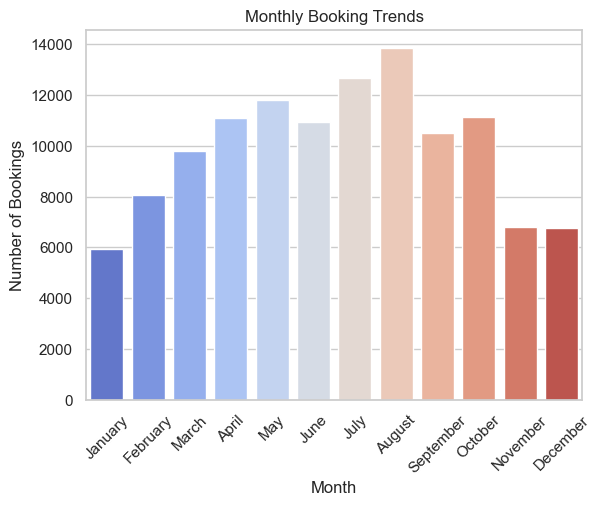

In [9]:
import os

# Ensure visuals directory exists
os.makedirs('../visuals', exist_ok=True)

# Count bookings per month (in order)
monthly_bookings = df['arrival_date_month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

# Plot
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# Save the plot
plt.savefig('../visuals/monthly_booking_trends.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.3 Cancellation Analysis

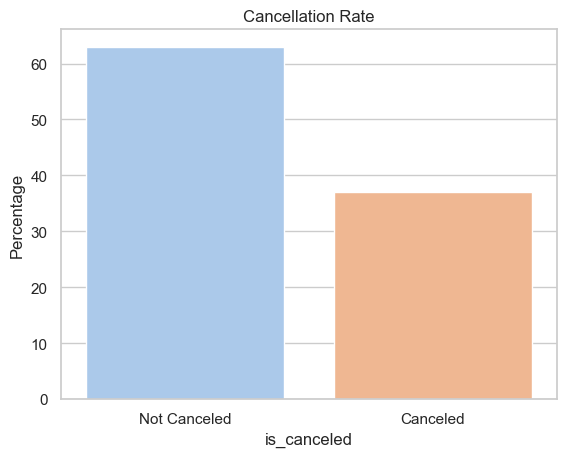

In [10]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Calculate cancellation rate
cancel_data = df['is_canceled'].value_counts(normalize=True) * 100

# Plot
sns.barplot(x=cancel_data.index, y=cancel_data.values, palette='pastel')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title('Cancellation Rate')
plt.ylabel('Percentage')

# Save the plot
plt.savefig('../visuals/cancellation_rate.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.4 Lead Time vs Cancellation

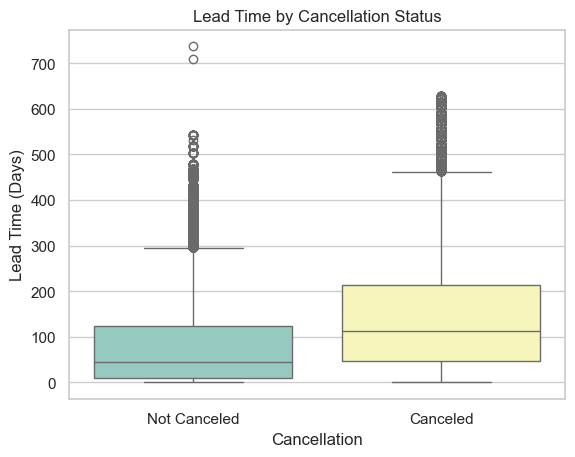

In [11]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Plot
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set3')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.title('Lead Time by Cancellation Status')
plt.xlabel('Cancellation')
plt.ylabel('Lead Time (Days)')

# Save the plot
plt.savefig('../visuals/lead_time_by_cancellation.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.5 Top 10 Countries by Booking

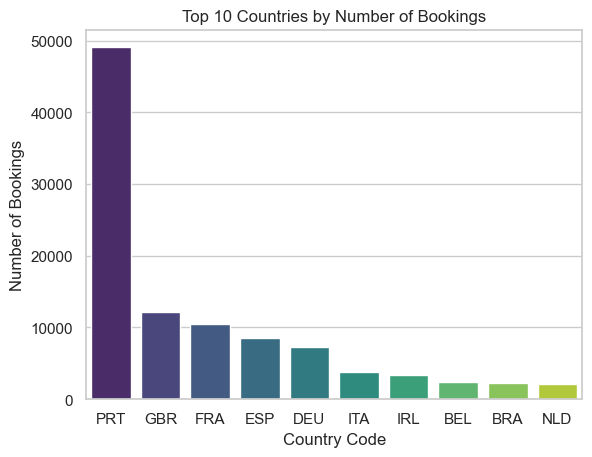

In [12]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Get top 10 countries by booking count
top_countries = df['country'].value_counts().head(10)

# Plot
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Bookings')
plt.ylabel('Number of Bookings')
plt.xlabel('Country Code')

# Save the plot
plt.savefig('../visuals/top_10_countries_bookings.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.6 Distribution by Customer Type

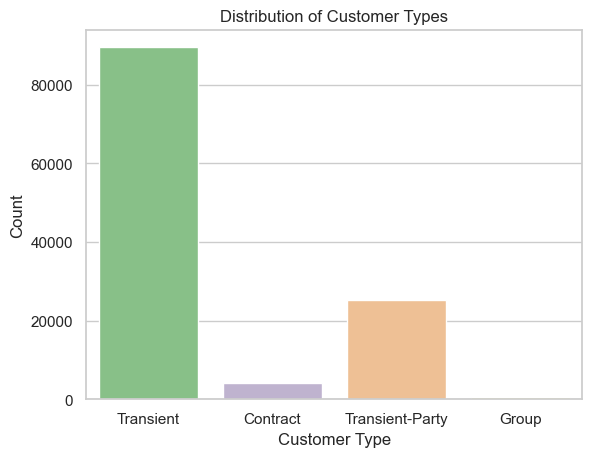

In [13]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Plot
sns.countplot(data=df, x='customer_type', palette='Accent')
plt.title('Distribution of Customer Types')
plt.ylabel('Count')
plt.xlabel('Customer Type')

# Save the plot
plt.savefig('../visuals/customer_type_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()


 #### 6.7 Deposit Type vs Cancellation

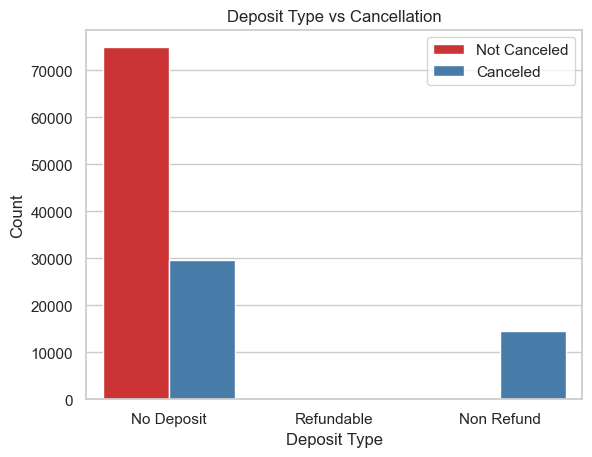

In [16]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

#plot
sns.countplot(data=df, x='deposit_type', hue='is_canceled', palette='Set1')
plt.xticks([0, 1, 2], df['deposit_type'].unique())
plt.title('Deposit Type vs Cancellation')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(['Not Canceled', 'Canceled'])

# Save the plot
plt.savefig('../visuals/deposit_type_vs_cancellation.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.8 Average Daily Rate (ADR) by Hotel Type

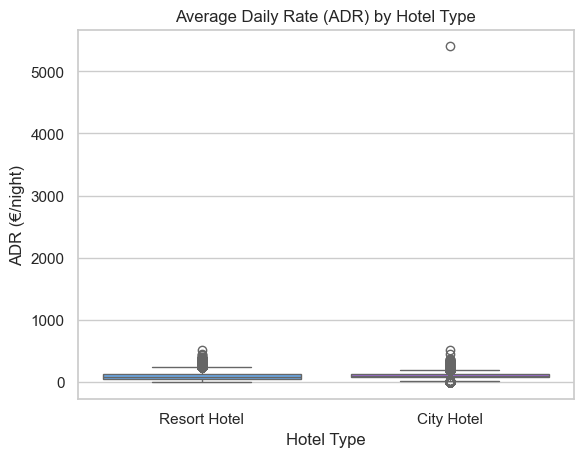

In [17]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

#plot
sns.boxplot(x='hotel', y='adr', data=df, palette='cool')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.ylabel('ADR (€/night)')
plt.xlabel('Hotel Type')

# Save the plot
plt.savefig('../visuals/adr_by_hotel_type.png', bbox_inches='tight')

# Show the plot
plt.show()


#### 6.9 Booking Changes and Cancellations

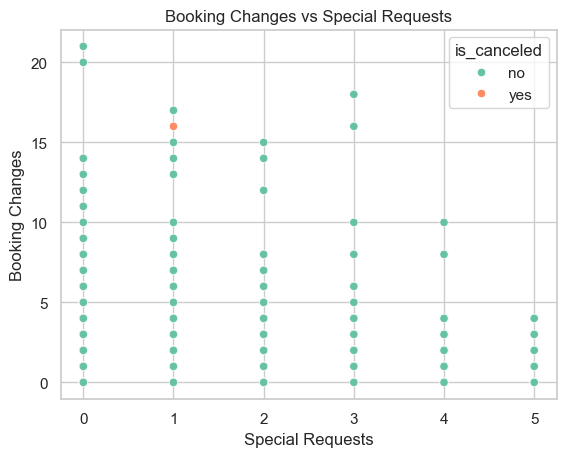

In [18]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

#plot
sns.scatterplot(data=df, x='total_of_special_requests', y='booking_changes',
                hue='is_canceled', palette='Set2')
plt.title('Booking Changes vs Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Booking Changes')

# Save the plot
plt.savefig('../visuals/special_requests_vs_changes.png', bbox_inches='tight')

# Show the plot
plt.show()


### 7. Correlation Heatmap

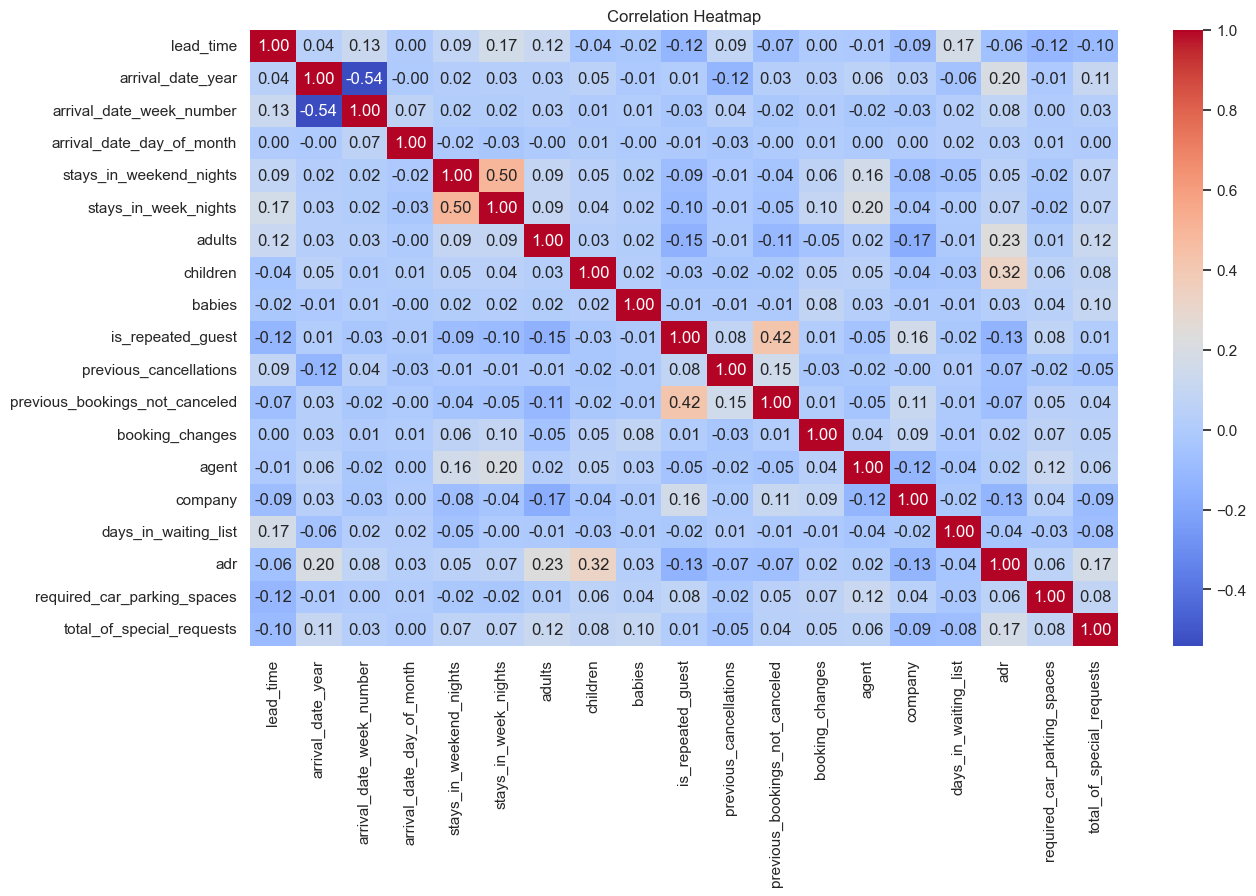

In [14]:
import os

# Ensure the visuals folder exists
os.makedirs('../visuals', exist_ok=True)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('../visuals/correlation_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()


### 8. Key Insights & Observations

##### Lead Time: Longer lead time correlates with higher cancellation.

##### Hotel Type: City hotels receive more bookings but also have more cancellations.

##### Seasonality: Bookings peak in July–August for Resort hotels.

##### Customer Segments: Individual travelers form the majority, with special needs affecting booking behavior.

##### Country Trends: Portugal leads in bookings, followed by the UK and France.

### 9. Save Cleaned Data (Optional)

In [15]:
df.to_csv('../data/hotel_bookings_cleaned.csv', index=False)


### 10. Conclusion

##### This EDA provides valuable insights into customer behavior, cancellation trends, and booking patterns. These can support decision-making for pricing, resource planning, and targeted marketing in the hospitality industry.